## 2018-01-18 Solar Sensor Precision Test 1
### Setup: All three sun sensors mounted to Orion RA/DEC tracking mount (so the x and y axes of the sun sensors were not aligned with azimuth/elevation). Removed tracking mount from cart platform to maximize stability of the sensors over the duration of testing. Sun sensors are NOT mounted in the same plane (each one is pointing a different direction as seen in the plots). Will 3D print a common mount for all sensors for next test so we can see how close they all match one another. No clouds, but pretty windy (gusts > 20mph?)
### Three separate captures of data
### run1: t_start: 18:29:10.919663   t_stop: 18:32:10.046908
### run2: t_start: 18:34:13.983997   t_stop: 18:43:13.077831
    strange noise (common to all sensors) between 18:35:47 and 18:35:48, and a similar event at 18:36:51 (maybe I bumped the tracker?)
### run3: t_start: 18:48:16.598192   t_stop: 19:08:45.954507 
    angle_x_raw_M out of FOV at 19:03:13, angle_y starts getting noisy shortly after
### available data for each sensor (sensor labels L,M,R for left, middle, right mounted):
        ['angle_x_raw_L'
        'angle_x_raw_M',
        'angle_x_raw_R',
        'angle_y_raw_L',
        'angle_y_raw_M',
        'angle_y_raw_R',
        'angle_x_filter_L',
        'angle_x_filter_M',
        'angle_x_filter_R',
        'angle_y_filter_L',
        'angle_y_filter_M',
        'angle_y_filter_R',
        'radiation_L'
        'radiation_M',
        'radiation_R',
        'temp_L',
        'temp_M',
        'temp_R']

In [1]:
%matplotlib inline
from calc_sun_sensor_stats import sensor_stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
################################################################################
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['figure.figsize'] = (10,7.5)
mpl.rcParams['figure.titlesize']=20
mpl.rcParams['xtick.labelsize']=15
mpl.rcParams['ytick.labelsize']=15
mpl.rcParams['font.size']=15
mpl.rcParams['axes.titlesize']=15
mpl.rcParams['axes.labelsize']=15
mpl.rcParams['lines.markersize'] = 4           # markersize, in points
mpl.rcParams['legend.markerscale'] = 3     # line width in points
mpl.rcParams['lines.markeredgewidth'] = 0.2 # the line width around the marker symbol
mpl.rcParams['lines.linewidth'] = 1.5
#####################################

In [2]:
files=["C:/git_repos/GLO/tracking/sun_sensors/sun_sensor_20180118_run1.csv",
       "C:/git_repos/GLO/tracking/sun_sensors/sun_sensor_20180118_run2.csv",
       "C:/git_repos/GLO/tracking/sun_sensors/sun_sensor_20180118_run3.csv"]

## Plot raw data for all three runs

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


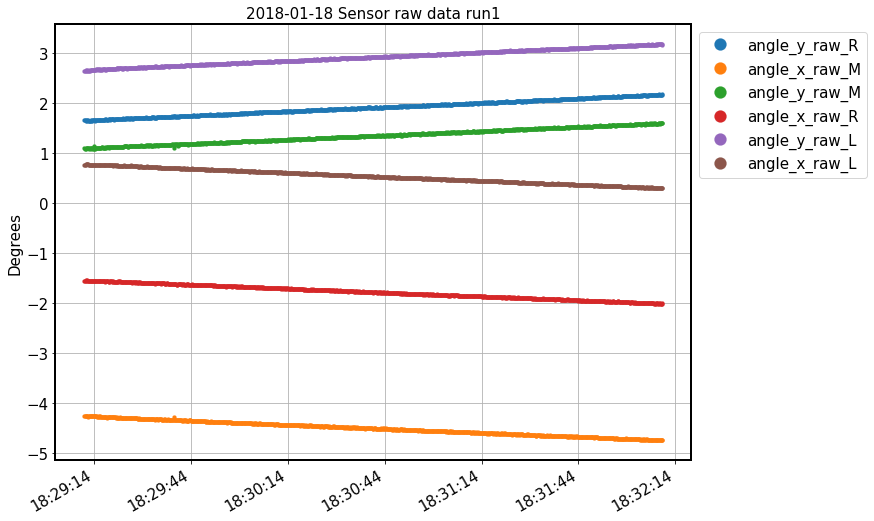

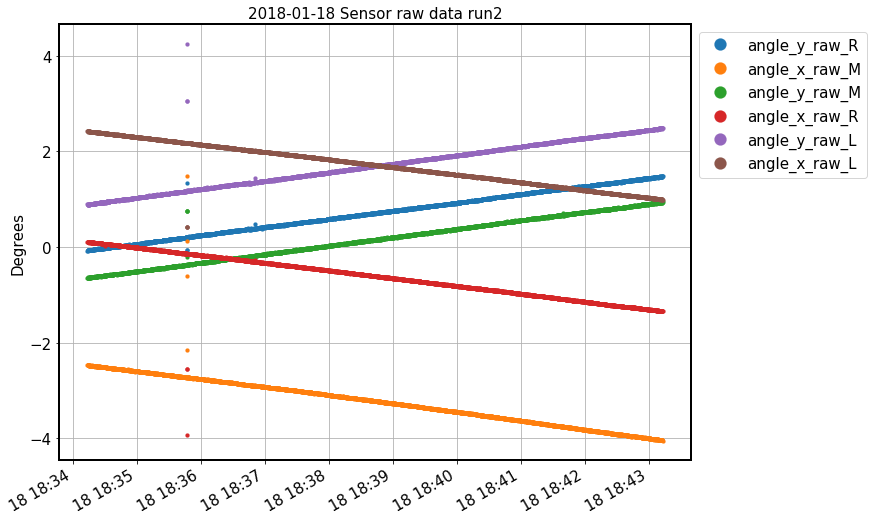

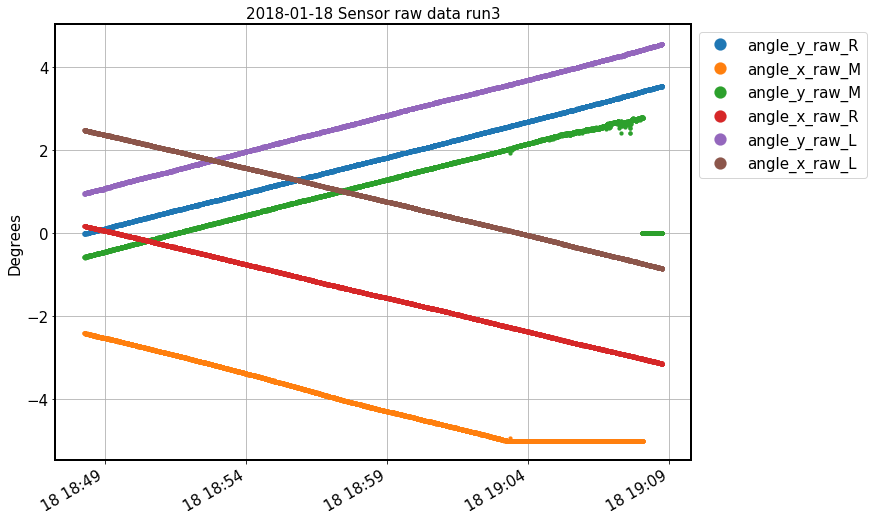

In [3]:
for i in range(len(files)):
    plt.figure()
    cols=  ['angle_x_raw_L',
            'angle_x_raw_M',
            'angle_x_raw_R',
            'angle_y_raw_L',
            'angle_y_raw_M',
            'angle_y_raw_R']
    stats = sensor_stats(files[i],cols)
    for key in list(stats.keys()):
        plt.plot(list(stats[key]['utc'].to_pydatetime()),stats[key]['raw'],'o',label=key)
        plt.ylabel('Degrees')
        plt.gcf().autofmt_xdate()
        plt.title('2018-01-18 Sensor raw data run'+str(i+1))
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Trimmed data to analyze to remove outliers or times when sun moved outside FOV of a sensor

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


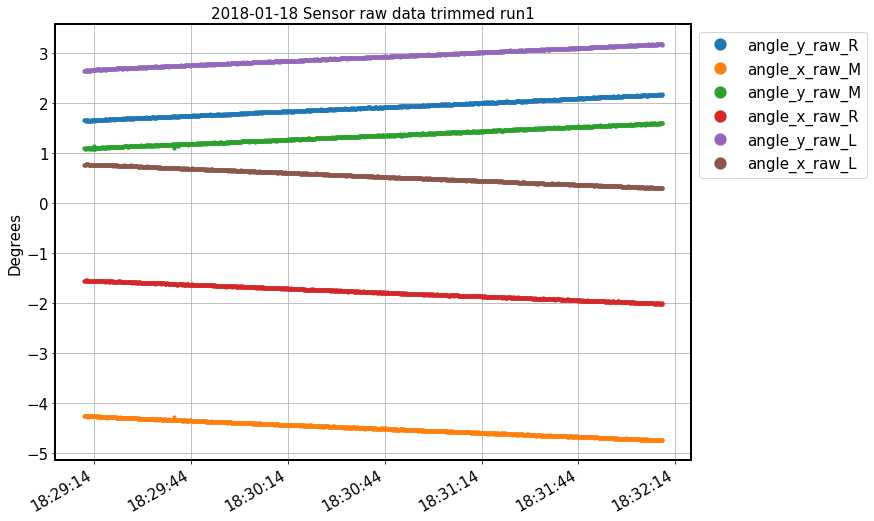

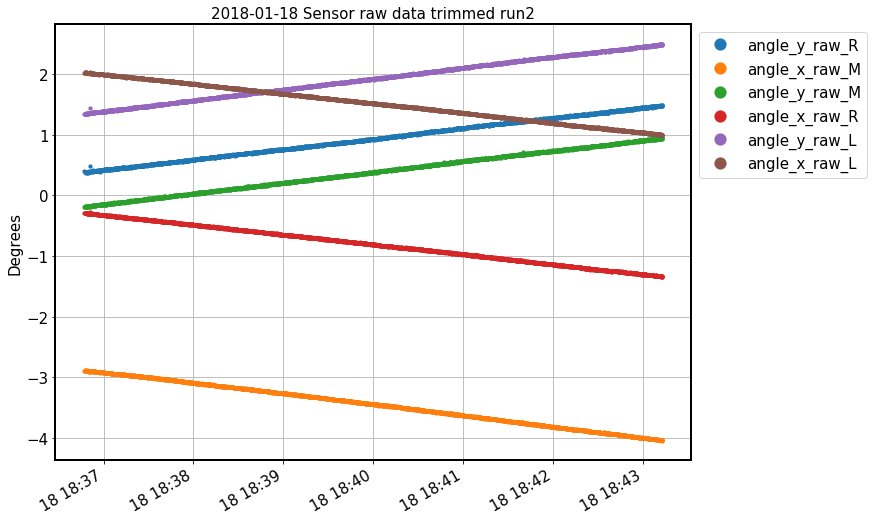

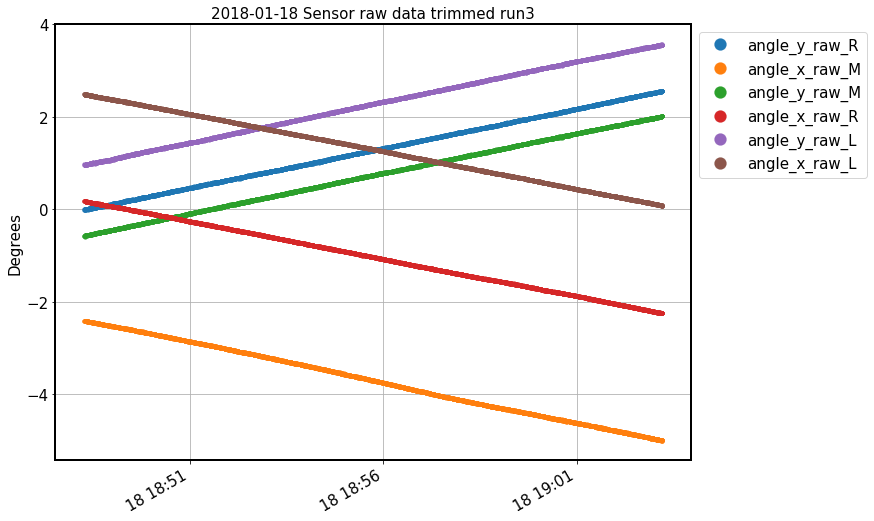

In [4]:
for i in range(len(files)):
    plt.figure()
    cols=  ['angle_x_raw_L',
            'angle_x_raw_M',
            'angle_x_raw_R',
            'angle_y_raw_L',
            'angle_y_raw_M',
            'angle_y_raw_R']
    stats = sensor_stats(files[i],cols)
    if i==0:
        stats = sensor_stats(files[i],cols)
    if i==1:
        stats = sensor_stats(files[i],cols,t_min=pd.datetime(2018,1,18,18,36,47))
    if i==2:
        stats = sensor_stats(files[i],cols,t_max=pd.datetime(2018,1,18,19,3,13))  
    for key in list(stats.keys()):
        plt.plot(list(stats[key]['utc'].to_pydatetime()),stats[key]['raw'],'o',label=key)
        plt.ylabel('Degrees')
        plt.gcf().autofmt_xdate()
        plt.title('2018-01-18 Sensor raw data trimmed run'+str(i+1))
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Plot the residuals using linear regression

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


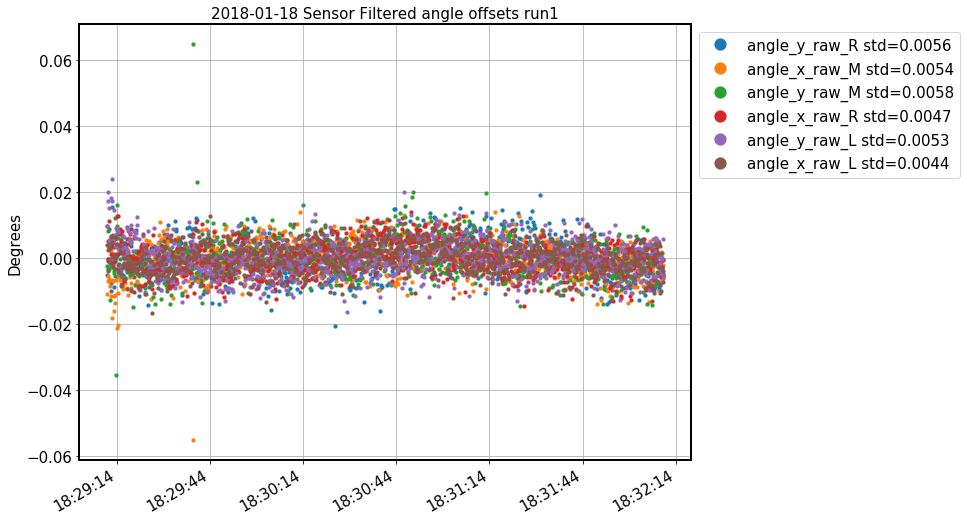

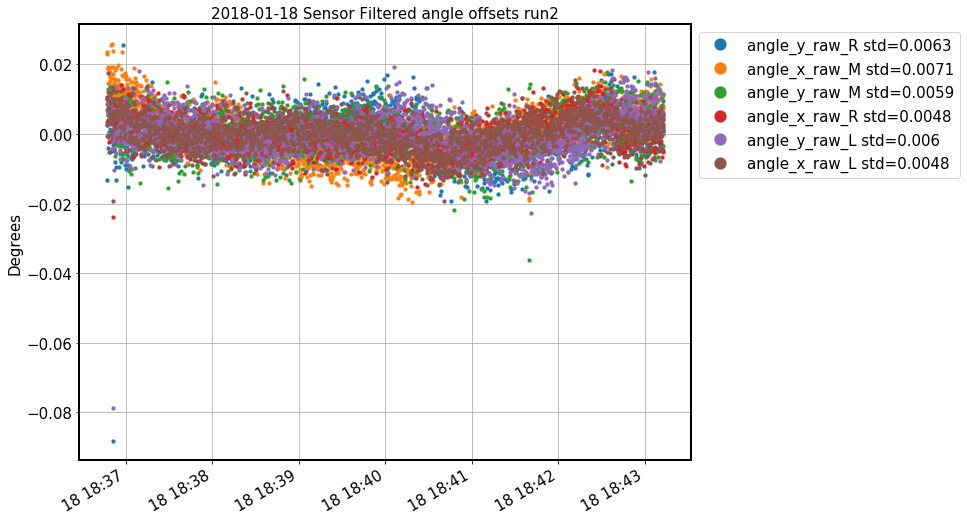

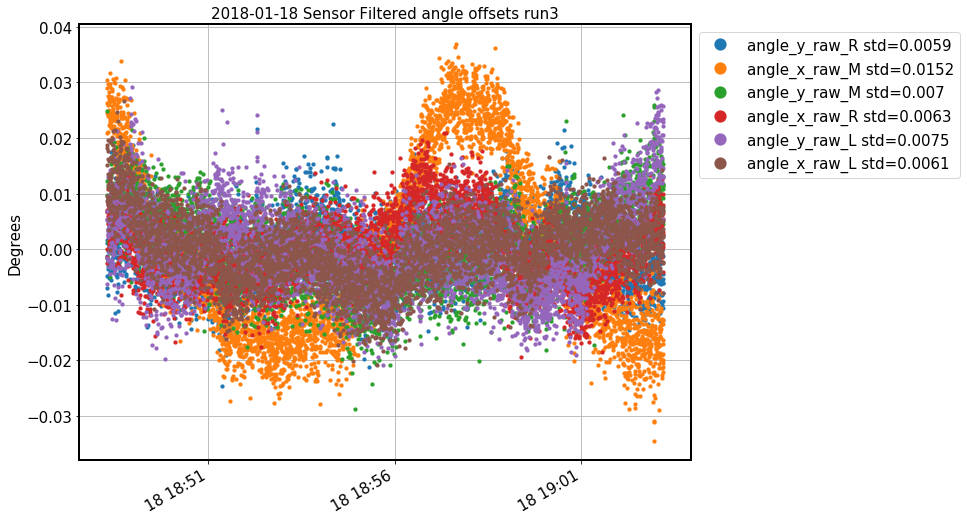

In [5]:
for i in range(len(files)):
    plt.figure()
    cols=  ['angle_x_raw_L',
            'angle_x_raw_M',
            'angle_x_raw_R',
            'angle_y_raw_L',
            'angle_y_raw_M',
            'angle_y_raw_R']
    if i==0:
        stats = sensor_stats(files[i],cols)
    if i==1:
        #stats = sensor_stats(files[i],cols)
        #stats = sensor_stats(files[i],cols,t_drop_start=pd.datetime(2018,1,18,18,35,47),t_drop_stop=pd.datetime(2018,1,18,18,38,48))
        stats = sensor_stats(files[i],cols,t_min=pd.datetime(2018,1,18,18,36,47))
    if i==2:
        stats = sensor_stats(files[i],cols,t_max=pd.datetime(2018,1,18,19,3,13)) 
    for key in list(stats.keys()):
        plt.plot(list(stats[key]['utc'].to_pydatetime()),stats[key]['off'],'o',label=key+' std='+str(round(stats[key]['std'],4)))
        plt.ylabel('Degrees')
        plt.gcf().autofmt_xdate()
        plt.title('2018-01-18 Sensor Filtered angle offsets run'+str(i+1))
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Plot sqrt(x_angle^2 + y_angle^2) to get 'total pointing' angle in degrees

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


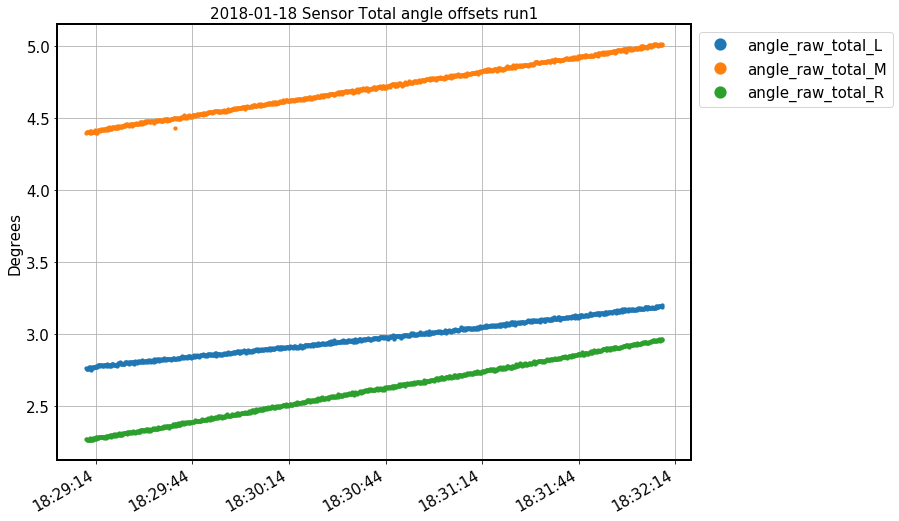

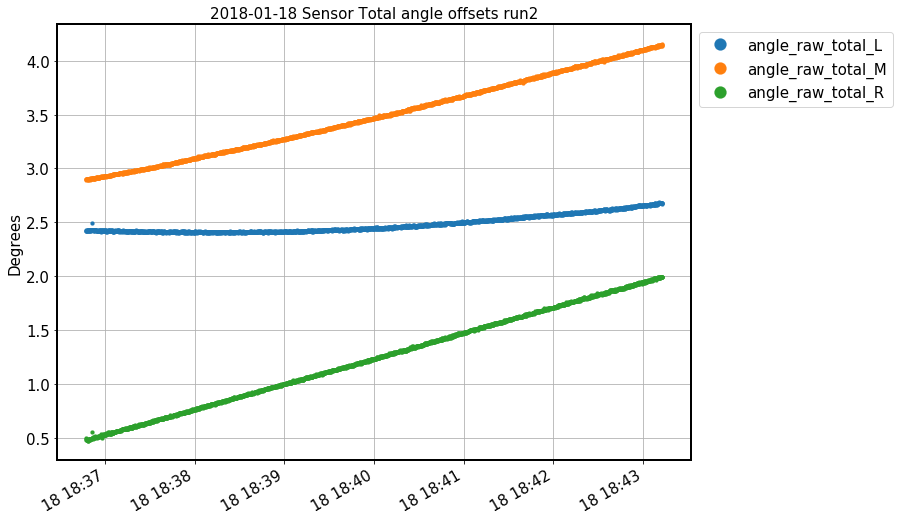

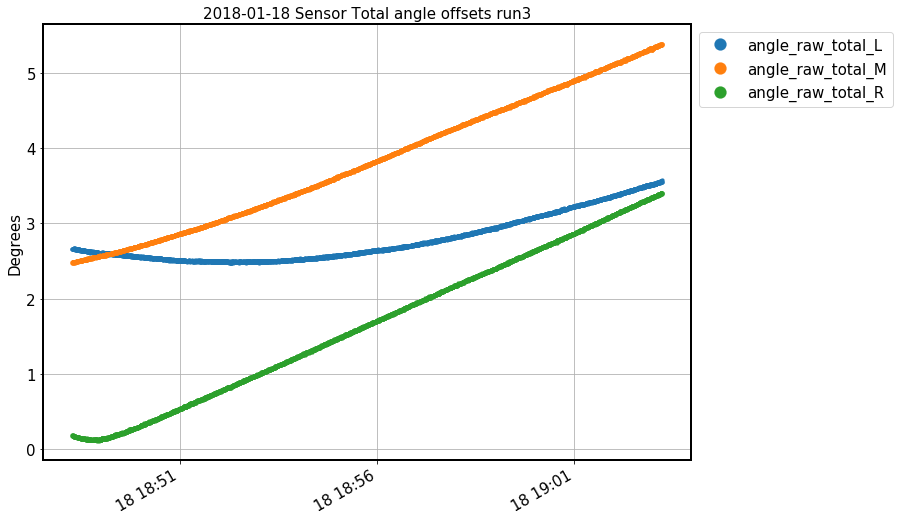

In [6]:
for i in range(len(files)):
    plt.figure()
    cols=  ['angle_x_raw_L',
            'angle_x_raw_M',
            'angle_x_raw_R',
            'angle_y_raw_L',
            'angle_y_raw_M',
            'angle_y_raw_R']
    if i==0:
        stats = sensor_stats(files[i],cols)
    if i==1:
        stats = sensor_stats(files[i],cols,t_min=pd.datetime(2018,1,18,18,36,47))
    if i==2:
        stats = sensor_stats(files[i],cols,t_max=pd.datetime(2018,1,18,19,3,13)) 

    stats['angle_raw_total_L'] = np.sqrt(stats['angle_x_raw_L']['raw']**2 + stats['angle_y_raw_L']['raw']**2)
    stats['angle_raw_total_M'] = np.sqrt(stats['angle_x_raw_M']['raw']**2 + stats['angle_y_raw_M']['raw']**2)
    stats['angle_raw_total_R'] = np.sqrt(stats['angle_x_raw_R']['raw']**2 + stats['angle_y_raw_R']['raw']**2)
    #for key in list(stats.keys()):
    plt.plot(list(stats['angle_x_raw_L']['utc'].to_pydatetime()),stats['angle_raw_total_L'],'o',label='angle_raw_total_L')
    plt.plot(list(stats['angle_x_raw_L']['utc'].to_pydatetime()),stats['angle_raw_total_M'],'o',label='angle_raw_total_M')
    plt.plot(list(stats['angle_x_raw_L']['utc'].to_pydatetime()),stats['angle_raw_total_R'],'o',label='angle_raw_total_R')
    plt.ylabel('Degrees')
    plt.gcf().autofmt_xdate()
    plt.title('2018-01-18 Sensor Total angle offsets run'+str(i+1))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Temperatures of each sensor

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


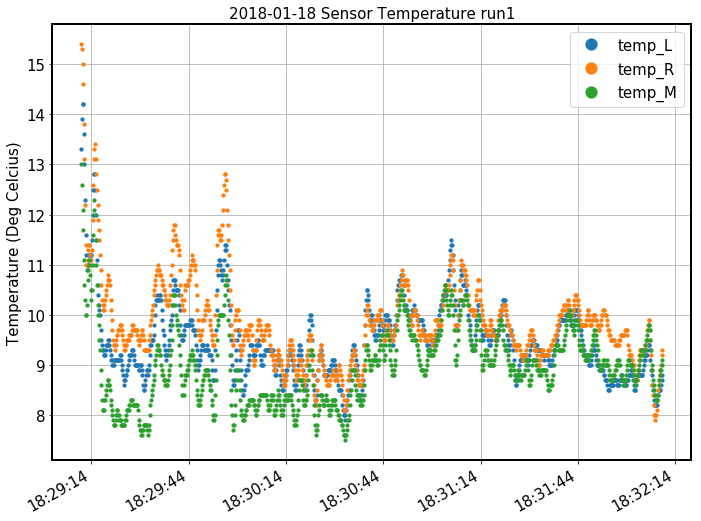

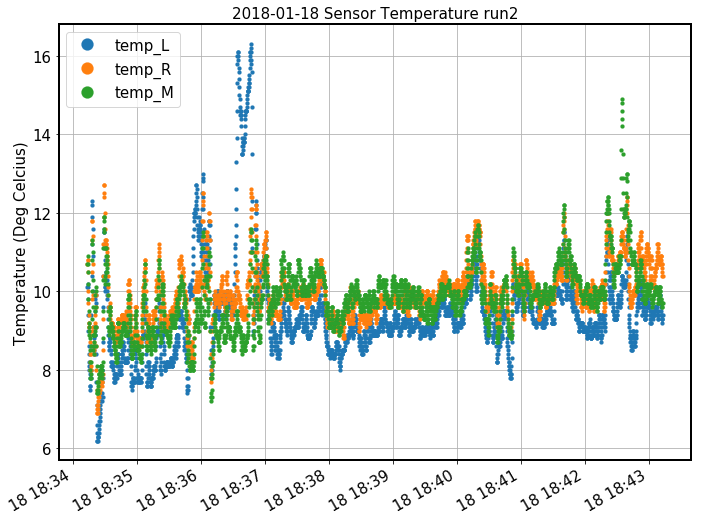

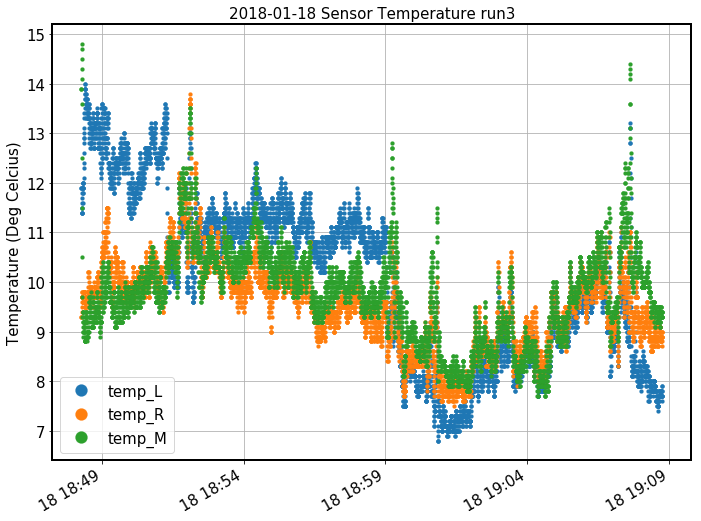

In [7]:
for i in range(len(files)):
    plt.figure()
    cols=['temp_L',
          'temp_M',
          'temp_R']
    stats = sensor_stats(files[i],cols)
    for key in list(stats.keys()):
        plt.plot(list(stats[key]['utc'].to_pydatetime()),stats[key]['raw'],'o',label=key)
        plt.ylabel('Temperature (Deg Celcius)')
        plt.gcf().autofmt_xdate()
        plt.title('2018-01-18 Sensor Temperature run'+str(i+1))
        plt.legend()



C:\Anaconda3\lib\site-packages\matplotlib\figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


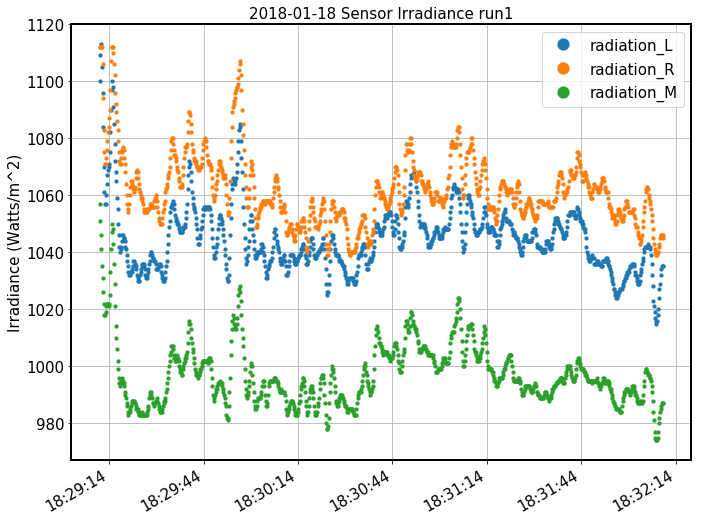

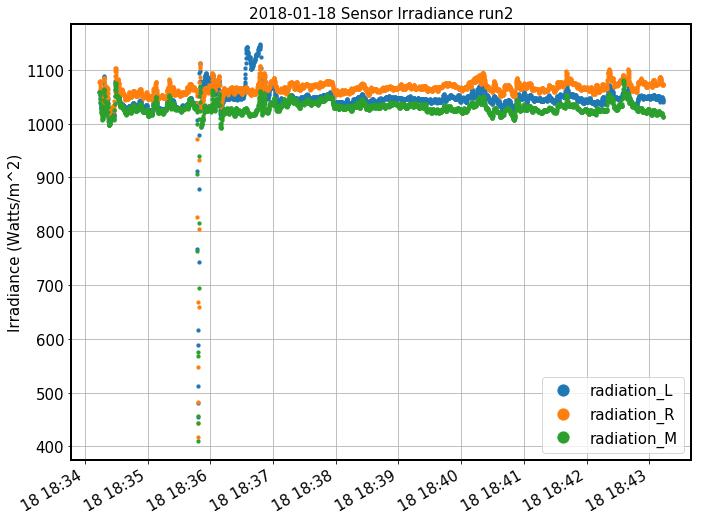

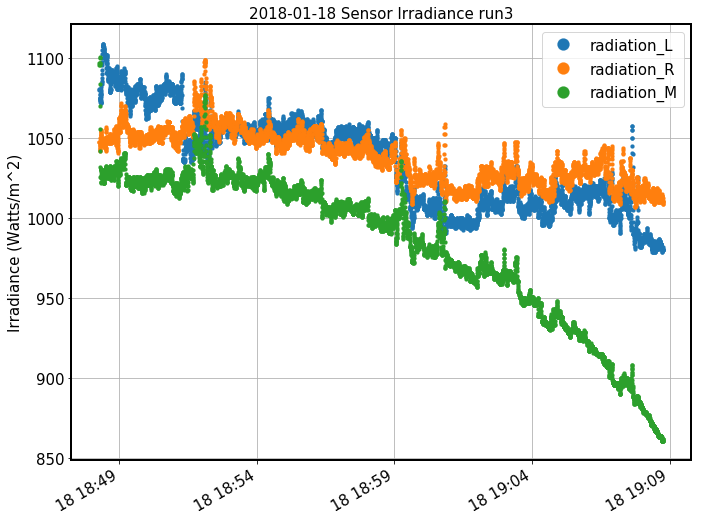

In [8]:
for i in range(len(files)):
    plt.figure()
    cols=['radiation_L',
      'radiation_M',
      'radiation_R']
    stats = sensor_stats(files[i],cols)
    for key in list(stats.keys()):
        plt.plot(list(stats[key]['utc'].to_pydatetime()),stats[key]['raw'],'o',label=key)
        plt.ylabel('Irradiance (Watts/m^2)')
        plt.gcf().autofmt_xdate()
        plt.title('2018-01-18 Sensor Irradiance run'+str(i+1))
        plt.legend()

## Show standard deviation of the residuals for linear regression lines and different order polynomial fits

In [9]:
for i in range(len(files)):
    plt.figure()
    cols=  ['angle_x_raw_L',
            'angle_x_raw_M',
            'angle_x_raw_R',
            'angle_y_raw_L',
            'angle_y_raw_M',
            'angle_y_raw_R']
    stats = sensor_stats(files[i],cols)
    if i==0:
        stats = sensor_stats(files[i],cols)
    if i==1:
        stats = sensor_stats(files[i],cols,t_min=pd.datetime(2018,1,18,18,36,47))
    if i==2:
        stats = sensor_stats(files[i],cols,t_max=pd.datetime(2018,1,18,19,3,13)) 


    for key in stats:
        print('RUN '+str(i+1))
        print('std of different fitted curves for '+key)
        print(stats[key]['fit'].subtract(stats[key]['raw'],axis=0).std())
        print('')


RUN 1
std of different fitted curves for angle_y_raw_R
line_fit      0.005621
polyfit_01    0.005621
polyfit_02    0.005542
polyfit_03    0.005264
polyfit_04    0.005231
polyfit_10    0.005040
dtype: float64

RUN 1
std of different fitted curves for angle_x_raw_M
line_fit      0.005389
polyfit_01    0.005389
polyfit_02    0.005007
polyfit_03    0.004966
polyfit_04    0.004962
polyfit_10    0.004894
dtype: float64

RUN 1
std of different fitted curves for angle_y_raw_M
line_fit      0.005822
polyfit_01    0.005822
polyfit_02    0.005662
polyfit_03    0.005655
polyfit_04    0.005640
polyfit_10    0.005531
dtype: float64

RUN 1
std of different fitted curves for angle_x_raw_R
line_fit      0.004699
polyfit_01    0.004699
polyfit_02    0.004638
polyfit_03    0.004564
polyfit_04    0.004370
polyfit_10    0.004280
dtype: float64

RUN 1
std of different fitted curves for angle_y_raw_L
line_fit      0.005265
polyfit_01    0.005265
polyfit_02    0.005254
polyfit_03    0.005012
polyfit_04    0.0